In [309]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [310]:
#reading the data file as dataframe
data = pd.read_csv("C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\Bridging Imaging Users to Imaging Analysis - 2022 (Responses) - Form Responses 1_copy.csv")

In [311]:
#Creating a dictionary to rename
dict_rename = {
    'Which of the following roles best describes you?':'Role', 
    'Which of the following do you have significant formal training in or experience with? Select all that apply.':'Training', 
    'Where do you currently primarily work?':'Location', 
    'How would you describe your work?':'Work description', 
    'How would you rate your computational skills?':'Level of computational skills', 
    'How would you rate your comfort in developing new computational skills?':'Comfort in developing computational skills', 
    'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.':'Approach to solutions', 
    'How frequently do you use scripting to solve image analysis problems?':'Frequency of script usage', 
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Scholarly "best practices" article]':'Preferable instructional methods articles',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Written step-by-step tutorial]':'Preferable instructional methods written tutorials',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Video tutorial]':'Preferable instructional methods Video tutorial',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Interactive webinar]':'Preferable instructional methods Interactive webinar',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [One-on-one "office hours" with an expert]':'Preferable instructional methods Office hours',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [In person seminar/tutorial lasting <1 day]':'Preferable instructional methods Seminar 1day',
    'In regards to learning more about image analysis, how preferable do you find each of these instructional methods? [Multiday workshop]':'Preferable instructional methods Multiday workshop',
    'How interested are you in learning more about the following topics? [Image analysis theory]':'Interes in topics Image analysis theory',
    'How interested are you in learning more about the following topics? [General image analysis practices]':'Interest in topics Image analysis practices',
    'How interested are you in learning more about the following topics? [Image analysis practices related to my (sub) discipline]':'Interest in topics related to sub discipline',
    'How interested are you in learning more about the following topics? [Learning to use a particular software tool]':'Interest in topics Specific software tool',
    'How interested are you in learning more about the following topics? [Deep learning as applied to image analysis]':'Interest in topics Deep learning for image analysis',
    'How interested are you in learning more about the following topics? [Analyzing large images/large numbers of images]':'Interest in topics Analyzing large images',
    'How interested are you in learning more about the following topics? [Visualizing image analysis results]':'Interest in topics Visualization of results',
    'The next question will ask you about particular image analysis tools and techniques. Do you want to answer questions about microscopy in the field/area of life sciences or physical sciences?':'Microscopy for life sciences physical sciences',
    'What image analysis tools have you used before? (check all that apply)':'usage of image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from manually selected fields]':'Types of images analyzed Brightfield/DIC/phase-contrast manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Brightfield/DIC/phase-contrast of cells or organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed Brightfield/DIC/phase-contrast automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from manually selected fields]':'Types of images analyzed-Fluorescent images manually acquired',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Fluorescent images of cells/organisms from an automated microscope (such as a high content imager)]':'Types of images analyzed automated',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Histologically stained tissue sections]':'Types of images analyzed-Histological tissue sections',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Electron microscopy]':'Types of images analyzed-Electro microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging mass spectrometry]':'Types of images analyzed-Imaging mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Imaging flow cytometry]':'Types of images analyzed-Imaging flow cytometry',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Superresolution (PALM/STORM)]':'Types of images analyzed-Superresolution (PALM/STORM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Autofluorescence imaging (ie FLIM)]':'Types of images analyzed-Autofluorescence imaging (ie FLIM)',
    'What kinds of images do you commonly want to analyze (select all that apply?* [Other]':'Types of images analyzed-Other',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?':'Well solved image analysis problems',
    'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions',
    'What image analysis tools have you used before? (check all that apply)':'Commonly used image analysis tools',
    'What image analysis tools do you use the most?':'Most used image analysis tools_physical sciences',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Optical microscopy/DIC/fractography]':'Types of images analyzed-Optical microscopy/DIC/fractography',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Scanning electron microscopy (secondary electron or back scattered imaging)]':'Types of images analyzed-Scanning electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Transmission electron microscopy (including electron diffraction and STEM imaging, e.g. HAADF-STEM)]':'Types of images analyzed-Transmission electron microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Spectroscopy/diffractive imaging in the SEM/TEM (eg. EDS, EBSD, EELS, CL)]':'Types of images analyzed-Spectroscopy/diffractive imaging in the SEM/TEM',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Imaging with mass spectrometry (eg SIMS/APT)]':'Types of images analyzed-Imaging with mass spectrometry',
    'What kinds of images do you commonly want to analyze (select all that apply)? [X-ray microscopy (including tomography)]':'Types of images analyzed-X-ray microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [FM imaging, force spectroscopy, single molecule force spectroscopy]':'Types of images analyzed-FM imaging force spectroscopy single molecule force spectroscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Fluorescence microscopy]':'Types of images analyzed-Fluorescence microscopy',
    'What kinds of images do you commonly want to analyze (select all that apply)? [Other]':'Types of images analyzed Other',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you think are generally well-solved?':'Well solved image analysis problems-physical sciences',
    'What image analysis problems (i.e. segmenting particles, 3D reconstruction, spectroscopic analysis, extracting force/mechanical property measurements, etc) do you wish had easier/better solutions?':'Image analysis problems which needs better solutions physical sciences',
    'Where did you hear about this survey? Please select all that apply.':'hear about this survey',
    'Please select any of the following you have attended in the past':'Previous experience',
    'Are there any image analysis workshops, tutorials, or conferences you are aware of and attended or considered attending? If so, how many?':'Number of conferences/workshops attended',
    'How would you most prefer to be notified about image analysis workshops, sessions, or conferences being planned?':'Notification of image analysis workshop',
    'Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful?  If yes, what made them beneficial?':'Experience with previous workshops/conferences',
    'Are there any conferences you\'ve attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?':'Recommended conferences/workshops',
    'What specific topics (i.e. overviews of a particular tool, comparisons between pieces of software, or how to use a certain tool for a certain kind of experiment) would you like to see prioritized for future image analysis workshop and tutorial offerings?':'Topics of interest',
    'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?':'Creators role',
    'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?':'Users role',
    'Any other thoughts?':'Other thoughts',
    'Would you be interested in subscribing to a mailing list (announcing workshops, new tools, collaboration opportunities, etc) for EITHER the Center for Open Bioimage Analysis OR Bioimaging North America OR the Royal Microscopical society? If yes, you will be taken to a page to subscribe, if not this form will submit.':'Subscription'
    }

In [312]:
#renaming the columbs of the dictionary
data.rename(columns=dict_rename, inplace=True)

In [313]:
# pie chart for the roles of the survey participants 
role_pie_chart = px.pie(data, values=data.Role.value_counts(), names=data.Role.value_counts().index, title="Roles of image analysis users", width=650, height=400)
role_pie_chart.update_traces(insidetextorientation = 'radial')
role_pie_chart.update_layout(title_x=0.5)

In [314]:
#Geo chart for the location of the participants; locations were given based on a country that is centrally located in a continent
demographics = data["Location"]
demographics_chart = px.scatter_geo(demographics, locations=['AUT', 'USA', 'KGZ', 'BRA', 'AUS','TCD'], size= data.Location.value_counts(), projection="natural earth", color = data.Location.value_counts().index, title="Location of the survey participants", labels={'color':'Continent'}, width=600, height=400)
demographics_chart.update_layout(title_x=0.5)

In [315]:
# Bar chart for the mostly used image analysis tools 
counts_tools = data["Most used image analysis tools_physical sciences"].value_counts().to_frame()
#label_name = {'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)':'Open source point-and-click software <br> (ImageJ, FIJI, Icy, CellProfiler, etc)', 'Computational libraries and scripts(python (scikit-image), MATLAB, etc)':'Computational libraries and scripts <br> (python (scikit-image), MATLAB, etc)', 'Commerical software that comes with my microscope (ie Columbus, Elements, Softworx, etc)':'Commerical software that comes with my microscope <br> (ie Columbus, Elements, Softworx, etc)', 'Other commercial software (Imaris, Volocity, etc)':'Other commercial software <br> (Imaris, Volocity, etc)'}
counts_tools

,Most used image analysis tools_physical sciences
"Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)",323
"Computational libraries and scripts (python (scikit-image), MATLAB, etc)",77
"Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)",29
"Other commercial software (Imaris, Volocity, etc)",25
None,5


In [316]:
px.bar(counts_tools, y=counts_tools['Most used image analysis tools_physical sciences'], x = ['Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)','Computational libraries and scripts (python (scikit-image), MATLAB, etc)','Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)', 'Other commercial software (Imaris, Volocity, etc)', 'None'], labels= {'Most used image analysis tools_physical sciences':'','Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)':'Open source point-and-click software <br> (ImageJ, FIJI, Icy, CellProfiler, etc)', 'Computational libraries and scripts(python (scikit-image), MATLAB, etc)':'Computational libraries and scripts <br> (python (scikit-image), MATLAB, etc)', 'Commerical software that comes with my microscope (ie Columbus, Elements, Softworx, etc)':'Commerical software that comes with my microscope <br> (ie Columbus, Elements, Softworx, etc)', 'Other commercial software (Imaris, Volocity, etc)':'Other commercial software <br> (Imaris, Volocity, etc)', 'x':'' })

In [317]:
# how users would like to ne notfied for future workshops
counts_notifications = data["Notification of image analysis workshop"].value_counts()
notifications = px.scatter(data, y=counts_notifications.index, x=counts_notifications.values, size=counts_notifications.values,orientation='v', width=1000, height=500)
notifications.update_layout(title_x=0.5)


In [318]:
# Whether users wanted to subscribe to the mailing list
subscription = data["Subscription"].value_counts()
subscription_graph = px.bar(data, x=subscription.index, y=subscription.values, labels={"x":"Preference", "y":'Numbers'}, width=1000, height=500)
subscription_graph.update_layout(title_x=0.5)

In [319]:
#Script usage for image analysis 
frequency =  data["Frequency of script usage"].value_counts()
frequency = px.bar(data, x=frequency.index, y=frequency.values, labels={'x':'', 'y':'Counts'}, width=400, height=400,color_continuous_scale='Fall', text_auto= True, title="Frequency of script usage for image analysis")
frequency.update_layout(title_x=0.5)
frequency.update_xaxes(categoryorder ="array", categoryarray = ['Often','Most of the time','Sometimes','Never'])

In [320]:
#Conferences attended
df = data["Number of conferences/workshops attended"]
conferences = df.value_counts()
conferences_attended = px.bar(df, x=conferences.index, y=conferences.values, color_continuous_scale='Fall', text_auto=True, labels = {'x':'','y':'Number of participants'}, width=500, height=400)
conferences_attended.update_layout(title_x=0.5)
conferences_attended.update_xaxes(categoryorder = 'array', categoryarray = ['Many','Some','Few','None'])
conferences_attended.update_layout(title='Conferences attended by the survey participants', title_x = 0.5)

In [321]:
# The domains in which the participants work with respect to the roles
data["Training"] = data["Training"].astype(str) # this was done to avoid the NaN rows for further analysis 

In [322]:
# Based on the values in a particular query column('Training'), a new column was created with boolean values based on the presence of the keyterms in the query column;,done using lambda fucntion
data['Cell/Molecular Biology'] = data['Training'].apply(lambda x: True if 'Cell/Molecular Biology' in x else False)
data['Physics/Biophysics'] = data["Training"].apply(lambda x: True if 'Physics/Biophysics'in x else False)
data['Chemistry/Biochemistry'] = data["Training"].apply(lambda x: True if 'Chemistry/Biochemistry'in x else False)
data['Statistics/Biostatistics'] =data['Training'].apply(lambda x: True if 'Statistics/Biostatistics' in x else False)
data['Medicine'] = data['Training'].apply(lambda x: True if 'Medicine' in x else False)
data['Computer science'] = data['Training'].apply(lambda x: True if 'Computer science' in x else False)
data['Computer vision'] = data['Training'].apply(lambda x: True if 'Computer vision' in x else False)
data['Deep learning'] = data['Training'].apply(lambda x: True if 'Deep learning' in x else False)
data['Developmental Biology'] = data['Training'].apply(lambda x: True if 'Developmental Biology' in x else False)

In [323]:
#slicing the columns of interest and performing counts to get the respective counts
df_Cell_Molecular_Biology = data.loc[:, ["Role","Cell/Molecular Biology"]]
Cell_Molecular_Biology = df_Cell_Molecular_Biology.groupby("Role").sum().reset_index()

df_Physics_Biophysics = data.loc[:, ["Role", "Physics/Biophysics"]]
Physics_Biophysics = df_Physics_Biophysics.groupby("Role").sum().reset_index()

df_Chemistry_Biochemistry =data.loc[:, ["Role", "Chemistry/Biochemistry"]]
Chemistry_Biochemistry = df_Chemistry_Biochemistry.groupby("Role").sum().reset_index()

df_Statistics_Biostatistics = data.loc[:, ["Role","Statistics/Biostatistics"]]
Statistics_Biostatistics = df_Statistics_Biostatistics.groupby("Role").sum().reset_index()

df_Medicine = data.loc[:, ["Role", "Medicine"]]
Medicine = df_Medicine.groupby("Role").sum().reset_index()

df_Computer_science = data.loc[:,["Role", "Computer science"]]
Computer_science = df_Computer_science.groupby("Role").sum().reset_index()

df_Computer_vision = data.loc[:, ["Role", "Computer vision"]]
Computer_vision = df_Computer_vision.groupby("Role").sum().reset_index()

df_Deep_learning = data.loc[:, ["Role", "Deep learning"]]
Deep_learning = df_Deep_learning.groupby("Role").sum().reset_index()

df_Developmental_Biology = data.loc[:, ["Role", "Developmental Biology"]]
Developmental_Biology = df_Developmental_Biology.groupby("Role").sum().reset_index()


In [324]:
#concatenating the dataframes with respect to roles and domains
df_role_domain = pd.concat([Cell_Molecular_Biology, Physics_Biophysics, Chemistry_Biochemistry, Statistics_Biostatistics, Medicine, Computer_science, Computer_vision, Deep_learning, Developmental_Biology], axis=1)

#since the roles column was repetitive, the duplicate 'role' columns were removed
df_role_domain = df_role_domain.T.drop_duplicates().T

role=df_role_domain["Role"]


In [325]:
# Stacked bar chart - role with domains on what the participants are working
x=role

fig = go.Figure(go.Bar(name='Developmental Biology', y=role, x=df_role_domain["Developmental Biology"], orientation='h', insidetextanchor='end', text=df_role_domain["Developmental Biology"]))
fig.add_trace(go.Bar(name='Deep learning', y=role, x=df_role_domain["Deep learning"], orientation='h', text=df_role_domain["Deep learning"]))
fig.add_trace(go.Bar(name='Computer vision', y=role, x=df_role_domain["Computer vision"],  orientation='h', text = df_role_domain["Computer vision"]))
fig.add_trace(go.Bar(name="Computer science", y=role, x=df_role_domain["Computer science"],  orientation='h', text=df_role_domain["Computer science"]))
fig.add_trace(go.Bar(name="Medicine", y=role, x=df_role_domain["Medicine"],  orientation='h', text =df_role_domain["Medicine"]))
fig.add_trace(go.Bar(name="Statistics/Biostatistics", y=role, x=df_role_domain["Statistics/Biostatistics"],  orientation='h', text =df_role_domain["Statistics/Biostatistics"]))
fig.add_trace(go.Bar(name="Chemistry/Biochemistry", y=role, x=df_role_domain["Chemistry/Biochemistry"],  orientation='h', text=df_role_domain["Chemistry/Biochemistry"]))
fig.add_trace(go.Bar(name="Physics/Biophysics", y=role, x=df_role_domain["Physics/Biophysics"],  orientation='h', text=df_role_domain["Physics/Biophysics"]))
fig.add_trace(go.Bar(name="Cell/Molecular Biology", y=role, x=df_role_domain["Cell/Molecular Biology"],  orientation='h', text=df_role_domain["Cell/Molecular Biology"]))

fig.update_layout(barmode='stack', title='Domains of the participants', title_x=0.5)
fig.update_yaxes(categoryorder = 'total ascending')
fig.show()

In [326]:
#Work description - creating new columns based on the values provided by the participants in the work description
data["Imaging"] = data.eval("`Work description` < 3")
data["Balanced"] = data.eval("`Work description` in [3,4,5]")
data["Analyst"] = data.eval("`Work description` > 5")
Work_type = [sum(data["Imaging"]), sum(data["Balanced"]), sum(data["Analyst"])]
Work_type

# creating a column for work type
data.loc[data["Work description"] < 3, "Work type" ] = "Imaging"
data.loc[(data["Work description"] >= 3) & (data["Work description"] < 5), "Work type"] = "Balanced"
data.loc[data["Work description"] >= 5, "Work type"] = "Analyst"
work_type_counts = data["Work type"].value_counts()
work_type_counts 

# creating a column for knowledge in computational skills 
data.loc[data["Level of computational skills"] < 3, "Knowledge of computational skills"] = "Low skill"
data.loc[(data["Level of computational skills"] >= 3) & (data["Level of computational skills"] < 5), "Knowledge of computational skills"] = "Medium skill"
data.loc[data["Level of computational skills"] >= 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge = data["Knowledge of computational skills"].value_counts()
computational_knowledge

High skill      244
Medium skill    183
Low skill        66
Name: Knowledge of computational skills, dtype: int64

In [327]:
# Creating a dataframe for work type and level of computational skills 
work_comp_1 = data["Work type"]
work_comp_2 = data["Knowledge of computational skills"]
work_comp = pd.concat([work_comp_1, work_comp_2], axis=1)

work_comp_grouped = work_comp.groupby("Work type").value_counts().reset_index()
work_comp_grouped = work_comp_grouped.rename(columns={0:'Counts'})
work_comp_grouped

work_comp_sunburst = px.sunburst(work_comp_grouped, path=["Work type", 'Knowledge of computational skills'], values='Counts', width=500, height=500)
work_comp_sunburst.update_traces(textinfo="label+percent parent")
work_comp_sunburst.update_layout(title="Work type and their computational skills", title_x=0.5)

In [328]:
# Comfort in developing new computational skills
data.loc[data["Comfort in developing computational skills"] < 3, 'Comfort'] = 'Low comfort'
data.loc[(data['Comfort in developing computational skills'] >= 3) & (data['Comfort in developing computational skills'] < 5), 'Comfort'] = "Medium comfort"
data.loc[data['Comfort in developing computational skills'] >= 5 , 'Comfort'] = "High comfort"

In [329]:
comfort_newskills = data["Comfort"].value_counts()
comfort_newskills

High comfort      291
Medium comfort    134
Low comfort        68
Name: Comfort, dtype: int64

In [330]:
#Subset of the dataframe to compare the comfort in developing new computational skills and their computational knowledge
comf_comp_1 = data["Comfort"]
comf_comp_2 = data["Knowledge of computational skills"]
comf_comp_comb = pd.concat([comf_comp_1, comf_comp_2], axis=1)

In [331]:
comf_comp_comb = comf_comp_comb.groupby("Comfort").value_counts().reset_index()
comf_comp_comb = comf_comp_comb.rename(columns={0:'Counts'})
comf_comp_comb

,Comfort,Knowledge of computational skills,Counts
0,High comfort,High skill,213
1,High comfort,Medium skill,67
2,High comfort,Low skill,11
3,Low comfort,Medium skill,33
4,Low comfort,Low skill,29
5,Low comfort,High skill,6
6,Medium comfort,Medium skill,83
7,Medium comfort,Low skill,26
8,Medium comfort,High skill,25


In [332]:
# sunburst charts for comfort in developing new computational skills and with level of computational skills 

comf_comp_sunburst = px.sunburst(comf_comp_comb, path=["Comfort", 'Knowledge of computational skills'], values='Counts', width=500, height=500)
comf_comp_sunburst.update_traces(textinfo="label+percent parent")
comf_comp_sunburst.update_layout(title="Comfort in developing new computational skills <br> compared with their knowledge in computational skills", title_x=0.5)


In [333]:
data["Approach to solutions"] = data["Approach to solutions"].astype(str)

In [334]:
# Ways people analyze data 

data['Play with a tool'] = data['Approach to solutions'].apply(lambda x: True if 'Sit down with a tool I know and start playing with the data' in x else False)
data["Ask a friend or colleague"] = data["Approach to solutions"].apply(lambda x: True if 'Ask a friend or colleague to help me'in x else False)
data["Ask on image sc forum"] = data["Approach to solutions"].apply(lambda x: True if 'Ask on forum.image.sc'in x else False)
data['Google'] = data["Approach to solutions"].apply(lambda x: True if 'Google' in x else False)
data["Particluar websites"] = data["Approach to solutions"].apply(lambda x:True if "particular website" in x else False)
data["Scientific literature"] = data["Approach to solutions"].apply(lambda x: True if 'scientific literature' in x else False)

In [335]:
ways_people_analyze_data = data.columns
ways_people_analyze_data_subset = ways_people_analyze_data[-6:]
ways_people_analyze_data_values= [data["Play with a tool"].sum(), data["Ask a friend or colleague"].sum(), data["Ask on image sc forum"].sum(), data["Google"].sum(), data["Particluar websites"].sum(), data["Scientific literature"].sum()]

In [336]:
ways_people_analyze_data_bar = px.bar(x=ways_people_analyze_data_subset, y =ways_people_analyze_data_values,text_auto=True, labels={'x':'', 'y':'Number of users'}, width =500, height=500)
ways_people_analyze_data_bar.update_layout(title ='Approach to solutions for image analysis problems', title_x = 0.5)
ways_people_analyze_data_bar.update_xaxes(categoryorder = 'total descending')

In [337]:
ways_people_analyze_data_subset

Index(['Play with a tool', 'Ask a friend or colleague',
       'Ask on image sc forum', 'Google', 'Particluar websites',
       'Scientific literature'],
      dtype='object')

In [338]:
#Preferable instructional methods 
Pre_mtd = go.Figure(go.Bar(name='Best practices articles', x=data["Preferable instructional methods articles"].value_counts().values, y=data["Preferable instructional methods articles"].value_counts().index, orientation='h', text=data["Preferable instructional methods articles"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Written tutorial', x=data["Preferable instructional methods written tutorials"].value_counts().values, y=data["Preferable instructional methods written tutorials"].value_counts().index, orientation='h', text=data["Preferable instructional methods written tutorials"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Video tutorial', x=data["Preferable instructional methods Video tutorial"].value_counts().values, y=data["Preferable instructional methods Video tutorial"].value_counts().index, orientation='h', text=data["Preferable instructional methods Video tutorial"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Interactive webinar', x=data["Preferable instructional methods Interactive webinar"].value_counts().values, y=data["Preferable instructional methods Interactive webinar"].value_counts().index, orientation='h', text=data["Preferable instructional methods Interactive webinar"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Office hours',x=data["Preferable instructional methods Office hours"].value_counts().values, y=data["Preferable instructional methods Office hours"].value_counts().index, orientation='h', text=data["Preferable instructional methods Office hours"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='One day seminar',x=data["Preferable instructional methods Seminar 1day"].value_counts().values, y=data["Preferable instructional methods Seminar 1day"].value_counts().index, orientation='h', text=data["Preferable instructional methods Seminar 1day"].value_counts().values))
Pre_mtd.add_trace(go.Bar(name='Multiday workshop',x=data["Preferable instructional methods Multiday workshop"].value_counts().values, y=data["Preferable instructional methods Multiday workshop"].value_counts().index, orientation='h', text=data["Preferable instructional methods Multiday workshop"].value_counts().values))

Pre_mtd.update_layout(title="Preferable instructional methods", title_x=0.5)
Pre_mtd.update_yaxes(categoryorder ='array', categoryarray = ['Not at all preferable', 'Somewhat preferable','Moderately preferable','Very preferable' ])
Pre_mtd.update_layout(barmode = 'stack')

In [339]:
#comparing the instructional methods with the computational skills 
mtds_skills_data = data.iloc[:, 10:17]
mtds_skills_data = pd.concat([mtds_skills_data, data["Knowledge of computational skills"]], axis=1)
mtds_skills_data.columns

Index(['Preferable instructional methods articles',
       'Preferable instructional methods written tutorials',
       'Preferable instructional methods Video tutorial',
       'Preferable instructional methods Interactive webinar',
       'Preferable instructional methods Office hours',
       'Preferable instructional methods Seminar 1day',
       'Preferable instructional methods Multiday workshop',
       'Knowledge of computational skills'],
      dtype='object')

In [340]:
mtds_skills_data_1=mtds_skills_data.iloc[:,1].value_counts()

In [341]:
mtds_skills_data_1

Very preferable          290
Moderately preferable    147
Somewhat preferable       53
Not at all preferable      3
Name: Preferable instructional methods written tutorials, dtype: int64

In [342]:
#Interest in various topics

interest_df = data.iloc[:,17:24]

In [343]:
# Topics of interest for the tutorials 
trial_radar = data["Interes in topics Image analysis theory"].value_counts().to_frame()
trial_radar_1=data["Interest in topics Image analysis practices"].value_counts().to_frame()
trial_radar_2=data["Interest in topics related to sub discipline"].value_counts().to_frame()
trial_radar_3=data["Interest in topics Specific software tool"].value_counts().to_frame()
trial_radar_4=data["Interest in topics Deep learning for image analysis"].value_counts().to_frame()
trial_radar_5=data["Interest in topics Analyzing large images"].value_counts().to_frame()
trial_radar_6=data["Interest in topics Visualization of results"].value_counts().to_frame()

#concatenating all the related columns for topics of interest
trial = pd.concat([trial_radar, trial_radar_1, trial_radar_2, trial_radar_3, trial_radar_4, trial_radar_5, trial_radar_6], axis=1)

#Reseting the index so that the column can be renamed
trial =trial.reset_index()
trial = trial.rename(columns={'index':'interest'})


In [344]:
#Interested topics for tutorials
int_top = go.Figure(go.Bar(name='Image analysis theory', y=trial["Interes in topics Image analysis theory"], x=trial["interest"], orientation='v', text=trial["Interes in topics Image analysis theory"]))
int_top.add_trace(go.Bar(name='Image analysis practices', y=trial["Interest in topics Image analysis practices"], x=trial["interest"], orientation='v', text=trial["Interest in topics Image analysis practices"]))
int_top.add_trace(go.Bar(name='Topics related to sub discipline', y=trial["Interest in topics related to sub discipline"], x=trial["interest"], orientation='v', text=trial["Interest in topics related to sub discipline"]))
int_top.add_trace(go.Bar(name='Specific software tool', y=trial["Interest in topics Specific software tool"], x=trial["interest"], orientation='v', text=trial["Interest in topics Specific software tool"]))
int_top.add_trace(go.Bar(name='Deep learning for image analysis', y=trial["Interest in topics Deep learning for image analysis"], x=trial["interest"], orientation='v', text=trial["Interest in topics Deep learning for image analysis"]))
int_top.add_trace(go.Bar(name='Analyzing large images', y=trial["Interest in topics Analyzing large images"], x=trial["interest"], orientation='v', text=trial["Interest in topics Analyzing large images"]))
int_top.add_trace(go.Bar(name='Visualization of results', y=trial["Interest in topics Visualization of results"], x=trial["interest"], orientation='v', text=trial["Interest in topics Visualization of results"]))

int_top.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)
int_top.update_yaxes(categoryorder ='array', categoryarray = ['Not at all interested', 'Somewhat interested', 'Moderately interested','Very interested'])
int_top.update_layout(barmode = 'group')

In [345]:
# Comparing topics of interest for the tutorials with the knowledge of computational skills 

# creating the combined dataframe with interests and the knowledge of computational skills 

int_skills_df = pd.concat([interest_df, data["Knowledge of computational skills"]], axis=1)
int_skills_df.astype(str)

,Interes in topics Image analysis theory,Interest in topics Image analysis practices,Interest in topics related to sub discipline,Interest in topics Specific software tool,Interest in topics Deep learning for image analysis,Interest in topics Analyzing large images,Interest in topics Visualization of results,Knowledge of computational skills
0,Somewhat interested,Moderately interested,Very interested,Very interested,Somewhat interested,Not at all interested,Somewhat interested,High skill
1,Somewhat interested,Very interested,Moderately interested,Somewhat interested,Very interested,Moderately interested,Somewhat interested,Medium skill
2,Somewhat interested,Somewhat interested,Moderately interested,Moderately interested,Moderately interested,Moderately interested,Moderately interested,Medium skill
3,Moderately interested,Very interested,Very interested,Very interested,Moderately interested,Somewhat interested,Moderately interested,Medium skill
4,Very interested,Moderately interested,Moderately interested,Not at all interested,Not at all interested,Moderately interested,Moderately interested,High skill
...,...,...,...,...,...,...,...,...
489,Moderately interested,Very interested,Very interested,Moderately interested,Moderately interested,Moderately interested,Very interested,Low skill
490,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Medium skill
491,Very interested,Very interested,Very interested,Somewhat interested,Very interested,Very interested,Very interested,High skill
492,Moderately interested,Moderately interested,Very interested,Very interested,Very interested,Very interested,Very interested,Medium skill


In [346]:
#creating the dataframes with specific interests and the knowledge of computational skills 
#group1 
image_analysis_theory = int_skills_df.iloc[:,[0,-1]].groupby("Interes in topics Image analysis theory").value_counts()
image_analysis_theory = image_analysis_theory.reset_index()
image_analysis_theory = image_analysis_theory.rename(columns={0:'counts'})

#group2
image_analysis_practices = int_skills_df.iloc[:,[1,-1]].groupby("Interest in topics Image analysis practices").value_counts()
image_analysis_practices = image_analysis_practices.reset_index()
image_analysis_practices = image_analysis_practices.rename(columns={0:'counts'})

#group3 
sub_disciplines = int_skills_df.iloc[:,[2,-1]].groupby("Interest in topics related to sub discipline").value_counts()
sub_disciplines = sub_disciplines.reset_index()
sub_disciplines = sub_disciplines.rename(columns={0:'counts'})

#group4
specific_tool = int_skills_df.iloc[:,[3,-1]].groupby("Interest in topics Specific software tool").value_counts()
specific_tool = specific_tool.reset_index()
specific_tool = specific_tool.rename(columns={0:'counts'})

#group5
deeplearning_analysis = int_skills_df.iloc[:,[4,-1]].groupby("Interest in topics Deep learning for image analysis").value_counts()
deeplearning_analysis = deeplearning_analysis.reset_index()
deeplearning_analysis = deeplearning_analysis.rename(columns={0:'counts'})

#group6 
large_images  = int_skills_df.iloc[:,[5,-1]].groupby("Interest in topics Analyzing large images").value_counts()
large_images = large_images.reset_index()
large_images = large_images.rename(columns={0:'counts'})

#group7 
visualization = int_skills_df.iloc[:,[6,-1]].groupby("Interest in topics Visualization of results").value_counts()
visualization = visualization.reset_index()
visualization = visualization.rename(columns={0:'counts'})



In [347]:
#stacked bar chart showing the topics of interest for the tutorials along with the level of computational skills of the participants
int_skills = go.Figure()

int_skills.add_trace(go.Bar(name ='Image analysis theory', x=image_analysis_theory["Interes in topics Image analysis theory"], y=image_analysis_theory["counts"], hovertext=image_analysis_theory["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Image analysis practices', x = image_analysis_practices["Interest in topics Image analysis practices"], y=image_analysis_practices["counts"], hovertext=image_analysis_theory["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Subdisciplines', x = sub_disciplines["Interest in topics related to sub discipline"], y=sub_disciplines["counts"], hovertext=sub_disciplines["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Specific tools', x = specific_tool["Interest in topics Specific software tool"], y=specific_tool["counts"], hovertext=specific_tool["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Deep learning', x = deeplearning_analysis["Interest in topics Deep learning for image analysis"], y=deeplearning_analysis["counts"], hovertext=deeplearning_analysis["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Analysing large images', x = large_images["Interest in topics Analyzing large images"], y=large_images["counts"], hovertext=large_images["Knowledge of computational skills"]))
int_skills.add_trace(go.Bar(name = 'Visualization of results', x = visualization["Interest in topics Visualization of results"], y=visualization["counts"], hovertext=visualization["Knowledge of computational skills"]))


int_skills.update_layout(barmode='group', xaxis = {'categoryorder':'array', 'categoryarray':['Very interested','Moderately interested','Somewhat interested','Not at all interested']})
int_skills.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)


In [348]:
life_physical_chart = data["life_physical"].value_counts()

KeyError: 'life_physical'

In [ ]:
data.iloc[:,24]

0      Physical Sciences
1          Life Sciences
2          Life Sciences
3          Life Sciences
4      Physical Sciences
             ...        
489        Life Sciences
490        Life Sciences
491        Life Sciences
492        Life Sciences
493        Life Sciences
Name: Microscopy for life sciences physical sciences, Length: 494, dtype: object

In [349]:
#What image analysis tools have you used before?

#Commonly used image analysis tools
data['Commonly used image analysis tools'] = data['Commonly used image analysis tools'].astype(str) # this is done to ignore the Nan for analysis 
data["Commercial software with the microscope"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Columbus' in x else False)
data["Other commercial software"] = data['Commonly used image analysis tools'].apply(lambda x: True if 'Imaris' in x else False)
data["Open source point-and-click software"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'FIJI' in x else False)
data["Computational libraries and scripts"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'MATLAB' in x else False)
data["Tools_none"] = data["Commonly used image analysis tools"].apply(lambda x: True if 'None' in x else False)

In [350]:
y = [data["Commercial software with the microscope"].sum(), data["Other commercial software"].sum(),
data["Open source point-and-click software"].sum(), data["Computational libraries and scripts"].sum(), data["Tools_none"].sum()]
com_tools_bar = px.bar(y=["Commercial software with the microscope", 'Other commercial software','Open source point-and-click software', 'Computational libraries and scripts', 'Tools_none'], x=[data["Commercial software with the microscope"].sum(), data["Other commercial software"].sum(),
data["Open source point-and-click software"].sum(), data["Computational libraries and scripts"].sum(), data["Tools_none"].sum()], orientation= 'h', text_auto=True)
                                              
com_tools_bar.update_layout(width=900, height=500, title="Commonly used image analysis tools", title_x=0.5)
com_tools_bar.update_yaxes(categoryorder = 'total ascending')
                                            

In [351]:
#Kinds of images 
# slicing the necessary columns
type_of_images = data.iloc[:, 27:38]
type_of_images



,Types of images analyzed Brightfield/DIC/phase-contrast manually acquired,Types of images analyzed Brightfield/DIC/phase-contrast automated,Types of images analyzed-Fluorescent images manually acquired,Types of images analyzed automated,Types of images analyzed-Histological tissue sections,Types of images analyzed-Electro microscopy,Types of images analyzed-Imaging mass spectrometry,Types of images analyzed-Imaging flow cytometry,Types of images analyzed-Superresolution (PALM/STORM),Types of images analyzed-Autofluorescence imaging (ie FLIM),Types of images analyzed-Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2D + time,2D + time,2D + time,2D + time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2D,2D,3D + time,3D + time,2D,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,"2D, 3D (<3000x3000x100)",NaN,2D,2D,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
489,NaN,NaN,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN,NaN,NaN,NaN,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN,NaN
490,2D,NaN,"2D, 2D + time, 3D + time","2D, 2D + time, 3D + time",2D,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,2D,NaN,NaN,NaN,NaN,NaN,NaN
492,2D,"2D + time, 3D + time",2D + time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3D (<3000x3000x100)


In [352]:
type_of_images = type_of_images.astype(str)
BF_manual = type_of_images.iloc[:,0].to_frame()
BF_automated = type_of_images.iloc[:,1].to_frame()
fluorescent_manual = type_of_images.iloc[:,2].to_frame()
fluorescent_automated = type_of_images.iloc[:,3].to_frame()
histology = type_of_images.iloc[:,4].to_frame()
electron_microscopy = type_of_images.iloc[:,5].to_frame()
imaging_ms = type_of_images.iloc[:,6].to_frame()
imaging_fc = type_of_images.iloc[:,7].to_frame()
super_resolution = type_of_images.iloc[:,8].to_frame()
autofluorescence_imaging = type_of_images.iloc[:,9].to_frame()
other = type_of_images.iloc[:,10].to_frame()



In [353]:
# Brightfield manually acquired
BF_manual["2D"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '2D' in x else False)
BF_manual["2D + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '2D + time' in x else False)
BF_manual["3D"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '<3000' in x else False)
BF_manual["3D + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '3D + time' in x else False)
BF_manual["3D (SPIM/large volume)"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_manual["3D large volume + time"] = BF_manual["Types of images analyzed Brightfield/DIC/phase-contrast manually acquired"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_manual_1 = BF_manual.drop(columns='Types of images analyzed Brightfield/DIC/phase-contrast manually acquired')
BF_manual_1 = BF_manual_1.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast manually acquired'})


In [354]:
# Brightfield automated 
BF_automated["2D"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '2D' in x else False)
BF_automated["2D + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '2D + time' in x else False)
BF_automated["3D"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '<3000' in x else False)
BF_automated["3D + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '3D + time' in x else False)
BF_automated["3D (SPIM/large volume)"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
BF_automated["3D large volume + time"] = BF_automated["Types of images analyzed Brightfield/DIC/phase-contrast automated"].apply(lambda x: True if '3D large volume + time' in x else False)

BF_automated_1 = BF_automated.drop(columns='Types of images analyzed Brightfield/DIC/phase-contrast automated')
BF_auotmated_1 = BF_automated_1.sum().to_frame().rename(columns={0:'Brightfield/DIC/phase-contrast auotmated'})


In [355]:
#fluorescent manual 
fluorescent_manual["2D"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '2D' in x else False)
fluorescent_manual["2D + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_manual["3D"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '<3000' in x else False)
fluorescent_manual["3D + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_manual["3D (SPIM/large volume)"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_manual["3D large volume + time"] = fluorescent_manual["Types of images analyzed-Fluorescent images manually acquired"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_manual_1 = fluorescent_manual.drop(columns='Types of images analyzed-Fluorescent images manually acquired')
fluorescent_manual_1 = fluorescent_manual_1.sum().to_frame().rename(columns={0:'Fluorescent images manually acquired'})

In [356]:
#fluorescent automated
fluorescent_automated["2D"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '2D' in x else False)
fluorescent_automated["2D + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '2D + time' in x else False)
fluorescent_automated["3D"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '<3000' in x else False)
fluorescent_automated["3D + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '3D + time' in x else False)
fluorescent_automated["3D (SPIM/large volume)"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
fluorescent_automated["3D large volume + time"] = fluorescent_automated["Types of images analyzed automated"].apply(lambda x: True if '3D large volume + time' in x else False)

fluorescent_automated_1 = fluorescent_automated.drop(columns='Types of images analyzed automated')
fluorescent_automated_1 = fluorescent_automated_1.sum().to_frame().rename(columns={0:'Fluorescent images automated'})

In [357]:
#histology
histology["2D"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '2D' in x else False)
histology["2D + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '2D + time' in x else False)
histology["3D"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '<3000' in x else False)
histology["3D + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '3D + time' in x else False)
histology["3D (SPIM/large volume)"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
histology["3D large volume + time"] = histology["Types of images analyzed-Histological tissue sections"].apply(lambda x: True if '3D large volume + time' in x else False)

histology_1 = histology.drop(columns='Types of images analyzed-Histological tissue sections')
histology_1 = histology_1.sum().to_frame().rename(columns={0:'Histological tissue sections'})

In [358]:
#Electron microscopy
electron_microscopy["2D"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '2D' in x else False)
electron_microscopy["2D + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '2D + time' in x else False)
electron_microscopy["3D"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '<3000' in x else False)
electron_microscopy["3D + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '3D + time' in x else False)
electron_microscopy["3D (SPIM/large volume)"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
electron_microscopy["3D large volume + time"] = electron_microscopy["Types of images analyzed-Electro microscopy"].apply(lambda x: True if '3D large volume + time' in x else False)

electron_microscopy_1 = electron_microscopy.drop(columns='Types of images analyzed-Electro microscopy')
electron_microscopy_1 = electron_microscopy_1.sum().to_frame().rename(columns={0:'Electron microscopy'})

In [359]:
#Imaging mass spectrometry 
imaging_ms["2D"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '2D' in x else False)
imaging_ms["2D + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '2D + time' in x else False)
imaging_ms["3D"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '<3000' in x else False)
imaging_ms["3D + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '3D + time' in x else False)
imaging_ms["3D (SPIM/large volume)"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
imaging_ms["3D large volume + time"] = imaging_ms["Types of images analyzed-Imaging mass spectrometry"].apply(lambda x: True if '3D large volume + time' in x else False)

imaging_ms_1 = imaging_ms.drop(columns='Types of images analyzed-Imaging mass spectrometry')
imaging_ms_1 = imaging_ms_1.sum().to_frame().rename(columns={0:'Imaging mass spectrometry'})

In [360]:
#Imaging flow cytometry 
imaging_fc["2D"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '2D' in x else False)
imaging_fc["2D + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '2D + time' in x else False)
imaging_fc["3D"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '<3000' in x else False)
imaging_fc["3D + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '3D + time' in x else False)
imaging_fc["3D (SPIM/large volume)"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
imaging_fc["3D large volume + time"] = imaging_fc["Types of images analyzed-Imaging flow cytometry"].apply(lambda x: True if '3D large volume + time' in x else False)

imaging_fc_1 = imaging_fc.drop(columns='Types of images analyzed-Imaging flow cytometry')
imaging_fc_1 = imaging_fc_1.sum().to_frame().rename(columns={0:'Imaging flow cytometry'})

In [361]:
#super resolution 
super_resolution["2D"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '2D' in x else False)
super_resolution["2D + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '2D + time' in x else False)
super_resolution["3D"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '<3000' in x else False)
super_resolution["3D + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '3D + time' in x else False)
super_resolution["3D (SPIM/large volume)"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
super_resolution["3D large volume + time"] = super_resolution["Types of images analyzed-Superresolution (PALM/STORM)"].apply(lambda x: True if '3D large volume + time' in x else False)

super_resolution_1 = super_resolution.drop(columns='Types of images analyzed-Superresolution (PALM/STORM)')
super_resolution_1 = super_resolution_1.sum().to_frame().rename(columns={0:'Superresolution (PALM/STORM)'})

In [362]:
#FLIM
autofluorescence_imaging["2D"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '2D' in x else False)
autofluorescence_imaging["2D + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '2D + time' in x else False)
autofluorescence_imaging["3D"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '<3000' in x else False)
autofluorescence_imaging["3D + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '3D + time' in x else False)
autofluorescence_imaging["3D (SPIM/large volume)"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
autofluorescence_imaging["3D large volume + time"] = autofluorescence_imaging["Types of images analyzed-Autofluorescence imaging (ie FLIM)"].apply(lambda x: True if '3D large volume + time' in x else False)

autofluorescence_imaging_1 = autofluorescence_imaging.drop(columns='Types of images analyzed-Autofluorescence imaging (ie FLIM)')
autofluorescence_imaging_1 = autofluorescence_imaging_1.sum().to_frame().rename(columns={0:'Autofluorescence imaging (ie FLIM)'})

In [363]:
#other
other["2D"] = other["Types of images analyzed-Other"].apply(lambda x: True if '2D' in x else False)
other["2D + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '2D + time' in x else False)
other["3D"] = other["Types of images analyzed-Other"].apply(lambda x: True if '<3000' in x else False)
other["3D + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '3D + time' in x else False)
other["3D (SPIM/large volume)"] = other["Types of images analyzed-Other"].apply(lambda x: True if '(SPIM/large volume)' in x else False)
other["3D large volume + time"] = other["Types of images analyzed-Other"].apply(lambda x: True if '3D large volume + time' in x else False)

other_1 = other.drop(columns='Types of images analyzed-Other')
other_1 = other_1.sum().to_frame().rename(columns={0:'Other'})

In [364]:
# combining all the dataframes
modality_type_combined = pd.concat([BF_manual_1, BF_auotmated_1, fluorescent_manual_1, fluorescent_automated_1, histology_1, electron_microscopy_1, imaging_ms_1, imaging_fc_1, super_resolution_1,autofluorescence_imaging_1,other_1], axis=1)

In [365]:
modality_type_combined = modality_type_combined.transpose()
modality_type_combined = modality_type_combined.reset_index()
modality_type_combined = modality_type_combined.rename(columns={'index':'modality'})


In [366]:
modality_type_combined

,modality,2D,2D + time,3D,3D + time,3D (SPIM/large volume),3D large volume + time
0,Brightfield/DIC/phase-contrast manually acquired,246,145,45,44,9,11
1,Brightfield/DIC/phase-contrast auotmated,150,100,22,28,4,5
2,Fluorescent images manually acquired,299,200,241,185,78,70
3,Fluorescent images automated,192,122,105,100,33,36
4,Histological tissue sections,205,16,33,9,11,4
5,Electron microscopy,112,8,46,10,28,16
6,Imaging mass spectrometry,28,1,4,2,0,1
7,Imaging flow cytometry,23,4,3,3,1,2
8,Superresolution (PALM/STORM),89,42,53,27,11,11
9,Autofluorescence imaging (ie FLIM),57,34,17,19,2,3


In [367]:
modality_type_combined

,modality,2D,2D + time,3D,3D + time,3D (SPIM/large volume),3D large volume + time
0,Brightfield/DIC/phase-contrast manually acquired,246,145,45,44,9,11
1,Brightfield/DIC/phase-contrast auotmated,150,100,22,28,4,5
2,Fluorescent images manually acquired,299,200,241,185,78,70
3,Fluorescent images automated,192,122,105,100,33,36
4,Histological tissue sections,205,16,33,9,11,4
5,Electron microscopy,112,8,46,10,28,16
6,Imaging mass spectrometry,28,1,4,2,0,1
7,Imaging flow cytometry,23,4,3,3,1,2
8,Superresolution (PALM/STORM),89,42,53,27,11,11
9,Autofluorescence imaging (ie FLIM),57,34,17,19,2,3


In [368]:
#stacked bar chart for the modality and types combined 

mod_type_chart = go.Figure()

mod_type_chart.add_trace(go.Bar(name='2D', x =modality_type_combined["2D"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["2D"]))
mod_type_chart.add_trace(go.Bar(name= '2D + time', x =modality_type_combined["2D + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["2D + time"]))
mod_type_chart.add_trace(go.Bar(name= '3D', x =modality_type_combined["3D"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D"]))
mod_type_chart.add_trace(go.Bar(name= '3D + time', x =modality_type_combined["3D + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D + time"]))
mod_type_chart.add_trace(go.Bar(name= '3D (SPIM/large volume)', x =modality_type_combined["3D (SPIM/large volume)"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D (SPIM/large volume)"]))
mod_type_chart.add_trace(go.Bar(name= '3D large volume + time', x =modality_type_combined["3D large volume + time"], y =modality_type_combined["modality"], orientation='h', text=modality_type_combined["3D large volume + time"]))

mod_type_chart.update_layout(barmode='stack', title ='What kinds of images do you commonly want to analyze?', title_x=0.5, height =500)
mod_type_chart.update_yaxes(categoryorder='total ascending')

In [369]:
from wordcloud import WordCloud, STOPWORDS

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\2866425087.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



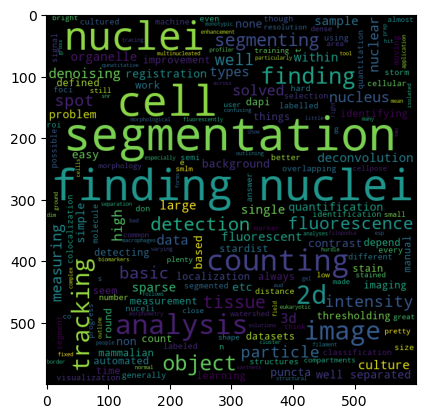

In [370]:
# wordcloud for well solved image analysis problems 
input = ''.join(data["Well solved image analysis problems"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=4).generate(input)
plt.imshow(well_solved_wc)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\317968450.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



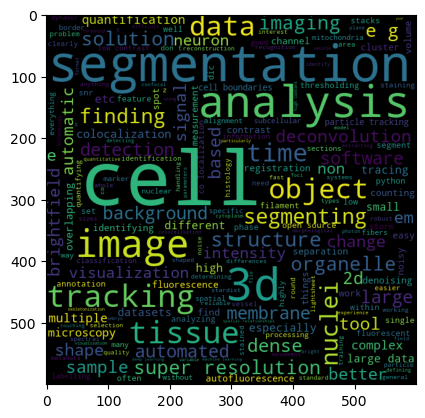

In [371]:
# wordcloud for image analysis problems which need better solutions
input_better = ''.join(data["Image analysis problems which needs better solutions"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_better = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_better)
plt.imshow(well_solved_better)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\2662343193.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



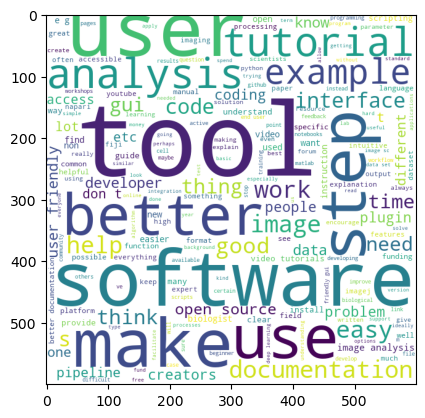

In [372]:
# wordcloud for creators role
input_creator = ''.join(data["Creators role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_creator = WordCloud(stopwords=STOPWORDS, background_color='white', width=600, height=600, random_state=1).generate(input_creator)
plt.imshow(well_solved_creator)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\3373685770.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



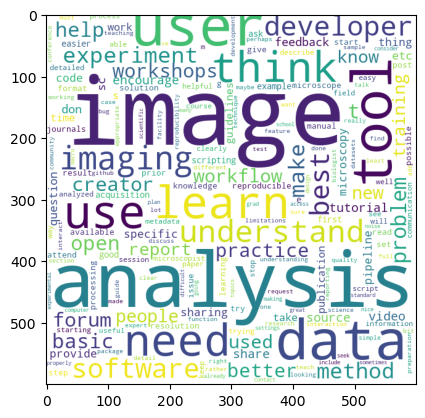

In [373]:
# wordcloud for users role
input_user = ''.join(data["Users role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_user = WordCloud(stopwords=STOPWORDS, background_color='white', width=600, height=600, random_state=1, collocations=False).generate(input_user)
plt.imshow(well_solved_user)

In [374]:
#Are there any image analysis workshops, tutorials, or conferences that you have participated in and found particularly helpful? If yes, what made them beneficial?
workshops = data["Experience with previous workshops/conferences"].str.lower().str.strip()
workshops = workshops.dropna(how='all').to_frame()

#creating new columns based on the values in the query column
workshops["NEUBIAS"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'neubias' in x else False)
workshops["Fiji/ImageJ"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if ('imagej' in x) or ('fiji' in x) else False)
workshops["Cellprofiler"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cellprofiler' in x else False)
workshops["Imaris"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'imaris' in x else False)
workshops["Robert Hasse"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'robert' in x else False)
workshops["AQLM"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'aqlm' in x else False)
workshops["CSHL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'cshl' in x else False)
workshops["I2K"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'i2k' in x else False)
workshops["EMBL"] = workshops['Experience with previous workshops/conferences'].apply(lambda x: True if 'embl' in x else False)

#Chart
workshops_for_chart = workshops.drop(columns=['Experience with previous workshops/conferences', 'CSHL'])
workshops_for_chart = workshops_for_chart.sum().to_frame()
workshops_chart = px.bar(workshops_for_chart, text_auto=True)
workshops_chart.update_layout(title_x=0.5, title='Workshops attended by the participants', width=500, height=500, showlegend=False)
workshops_chart.update_xaxes(categoryorder = 'total descending')


In [375]:
#Are there any conferences you've attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?

addition = data["Recommended conferences/workshops"]
addition = addition.dropna(how='all')
addition = addition.str.lower().str.strip()
addition = list(addition)
addition_list = [i.split() for i in addition]
addition_list = np.concatenate(addition_list)
addition_list = [i.replace('(', '') for i in addition_list]
addition_list = [i.replace('/', '') for i in addition_list]
addition_list = [i.replace(')', '') for i in addition_list]
type(addition_list)
addition_list_updated = list(addition_list_updated)
type(addition_list_updated)
remove = ['of','the','to','and', 'no', 'i','a', 'any', 'would','them', 'for', 'in','can','much', 'into', 'most', 'that', 'are', 'it', 'from', 'but', 'be', 'with', 'none', 'dont', 'think', 'more', 'could', 'not', 'on', 'at', 'is','if', 'this', 'have', 'yes', 'or', 'etc.']
addition_list_updated = [i for i in addition_list if i not in remove]
addition_list_updated
Counter(addition_list_updated)

NameError: name 'addition_list_updated' is not defined

In [377]:
#creating a dataframe for the conferences 

data_df = [['ASCB', 10], ['ELMI', 7], ['ABRF', 5], ['NEUBIAS', 4], ['MMC', 4]]
conf_df = pd.DataFrame(data_df, columns=['Conferences', 'Counts'])
conf_df_chart = px.bar(conf_df, x='Conferences', y='Counts', width=500, height=500, text_auto=True)


In [378]:
#topics for future workshops/tutorials 
topics_future = data['Topics of interest']
topics_future = topics_future.dropna(how='all')
topics_future = topics_future.str.lower().str.strip()
topics_future_list = list(topics_future)
topics_future_list

["how to be sure you're using the correct tool. what is the underlying algorithm and why is this correct for my particular image analysis problem?",
 'build up customized plugin (imagej or other powerful software)',
 'more software and plugin development, particularly imagej2/imglib2 development',
 'i think general image analysis workshops are lacking and sometimes the offers are "too specific/niche/specialized" which might be off putting for new attendees.',
 'image analysis theory',
 'comparisons between pieces of software',
 'ai/dl approaches for segmentation',
 'not sure.',
 "i'd love intermediate level. most of the conferences i see are either very basic fiji/python or full on heavy program development. right now i'm trying to bridge the gap between those two spaces and finding it quite difficult to find the right resource. or even a course/seminar on how to move from primarily lab-based to primarily computational and what roles are available.\n\ni'd also love sessions on how to i

In [379]:
topic_data = data["Topics of interest"].dropna(how='all').to_frame()
from nltk.corpus import stopwords
nltk.download('stopwords')
stoplist = stopwords.words('english') 

NameError: name 'nltk' is not defined

In [380]:
# Creating a dataframe of unigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

NameError: name 'stoplist' is not defined

In [ ]:
# Creating a dataframe of bigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
# Creating a dataframe of trigrams 
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_data["Topics of interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_unigram.head(30)

,frequency,bigram/trigram
0,67,analysis
1,48,image
2,44,tools
3,41,software
4,40,use
5,30,learning
6,29,data
7,21,segmentation
8,21,deep
9,19,would


In [ ]:
df_bigram.head(30)

,frequency,bigram/trigram
0,33,image analysis
1,20,deep learning
2,12,open source
3,10,use certain
4,7,machine learning
5,6,tool certain
6,6,kind experiment
7,5,would useful
8,5,certain tool
9,5,certain kind


In [ ]:
df_trigram.head(30)

,frequency,bigram/trigram
0,5,use certain tool
1,5,tool certain kind
2,5,certain tool certain
3,5,certain kind experiment
4,4,use certain tools
5,4,open source software
6,4,comparisons pieces software
7,3,using open source
8,3,open source tools
9,3,deep learning approaches


In [381]:
#2022 data based on the unigrams, bigrams and trigrams 
topic_data["Python/coding/script"] = topic_data["Topics of interest"].str.contains('python|coding|script', case=False)
topic_data["Segmentation"] = topic_data['Topics of interest'].str.contains('segmentation|cell segmentation', case=False)
topic_data["napari"] = topic_data['Topics of interest'].str.contains('napari', case=False)
topic_data["Certain tools"] = topic_data['Topics of interest'].str.contains('certain tool', case=False)
topic_data["Open source"] = topic_data['Topics of interest'].str.contains('open source', case=False)
topic_data["Deep/machine learning"] = topic_data['Topics of interest'].str.contains('deep|machine', case=False)
topic_data["Fiji/ImageJ/Macro"] = topic_data['Topics of interest'].str.contains('imagej|fiji|macro', case=False)
topic_data["Best practices"] = topic_data['Topics of interest'].str.contains('best practices', case=False)
topic_data["Cellprofiler"] = topic_data['Topics of interest'].str.contains('cellprofiler', case=False)
topic_data["Comparisons"] = topic_data['Topics of interest'].str.contains('comparison', case=False)

In [382]:
topic_data_1 = topic_data.drop(columns=['Topics of interest'])
topic_data_sum = topic_data_1.sum()

#chart for the topics of interest for the future workshop
topic_data_chart = px.bar(topic_data_sum, labels={'value':'counts', 'index':''}, text_auto=True)
topic_data_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False)
topic_data_chart.update_xaxes(categoryorder='total descending')



In [383]:
#Comparing with the previous years data (topics of interest for the image analysis tutorials)

topic_interest_data_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_specific_topics_ie_overviews_of_a_particular_tool_comparisons_between_pieces_of_software_or_how_to_use_a_certain_tool_for_a_certain_kind_of_experiment_would_you_like_to_s.txt')
topic_interest_data_2021= topic_interest_data_2021.rename(columns={'0':'interest'})

In [384]:
#unigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})

NameError: name 'stoplist' is not defined

In [ ]:
df_2021_unigram.head(30)

,frequency,unigram
0,81,analysis
1,58,tools
2,57,image
3,44,learning
4,42,software
5,39,data
6,36,use
7,33,tool
8,32,would
9,30,3d


In [ ]:
#bigrams from 2021
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(topic_interest_data_2021["interest"])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_2021_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

In [ ]:
df_2021_bigram.head(30)

,frequency,bigram
0,33,image analysis
1,24,deep learning
2,20,open source
3,13,machine learning
4,12,use certain
5,12,certain tool
6,10,analysis tools
7,8,tool certain
8,8,certain kind
9,7,kind experiment


In [386]:
#topics of interest for the tutorials with 2021 data 
topic_interest_data_2021["Python/coding/script"] = topic_interest_data_2021["interest"].str.contains('python|coding|script', case=False)
topic_interest_data_2021["Segmentation"] = topic_interest_data_2021['interest'].str.contains('segmentation|cell segmentation', case=False)
topic_interest_data_2021["napari"] = topic_interest_data_2021['interest'].str.contains('napari', case=False)
topic_interest_data_2021["Certain tools"] = topic_interest_data_2021['interest'].str.contains('certain tool', case=False)
topic_interest_data_2021["Open source"] = topic_interest_data_2021['interest'].str.contains('open source', case=False)
topic_interest_data_2021["Deep/machine learning"] = topic_interest_data_2021['interest'].str.contains('deep|machine', case=False)
topic_interest_data_2021["Fiji/ImageJ/macro"] = topic_interest_data_2021['interest'].str.contains('imagej|fiji|macro', case=False)
topic_interest_data_2021["Best practices"] = topic_interest_data_2021['interest'].str.contains('best practices', case=False)
topic_interest_data_2021["Cellprofiler"] = topic_interest_data_2021['interest'].str.contains('cellprofiler', case=False)
topic_interest_data_2021["Comparisons"] = topic_interest_data_2021['interest'].str.contains('comparison', case=False)

topic_data_2021 = topic_interest_data_2021.drop(columns=['interest'])
topic_data_2021_sum = topic_data_2021.sum()

#chart for the topics of interest for the future workshop
topic_data_2021_chart = px.bar(topic_data_2021_sum, labels= {'value':'counts', 'index':''}, text_auto=True)
topic_data_2021_chart.update_layout(title='Topics of interest for the image analysis tutorials', title_x=0.5, width = 500, height=500, showlegend=False)
topic_data_2021_chart.update_xaxes(categoryorder='total descending')

In [387]:
# work type_2021
work_type_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_describe_your_work.txt')
work_type_2021= work_type_2021.rename(columns={'0':'work_type'})

In [388]:
work_type_2021.loc[work_type_2021["work_type"] < 3, "Work type" ] = "Imaging"
work_type_2021.loc[(work_type_2021["work_type"] >= 3) & (work_type_2021["work_type"] < 5), "Work type"] = "Balanced"
work_type_2021.loc[work_type_2021["work_type"] >= 5, "Work type"] = "Analyst"
work_type_counts_2021 = work_type_2021["Work type"].value_counts()
work_type_counts_2021 

Balanced    289
Analyst     132
Imaging      63
Name: Work type, dtype: int64

In [389]:
work_type_chart_2021 = px.pie(work_type_2021, values= work_type_counts_2021.values, names=work_type_counts_2021.index, title='Work type - 2021', width = 400, height=400)
work_type_chart_2021.update_layout(title_x=0.5)

In [390]:
#knowledge in computational skills_2021 
comp_skill_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\How_would_you_rate_your_computational_skills.txt')
comp_skill_2021= comp_skill_2021.rename(columns={'0':'comp_skill'})

comp_skill_2021.loc[comp_skill_2021["comp_skill"] < 3, "Knowledge of computational skills"] = "Low skill"
comp_skill_2021.loc[(comp_skill_2021["comp_skill"] >= 3) & (data["Level of computational skills"] < 5), "Knowledge of computational skills"] = "Medium skill"
comp_skill_2021.loc[comp_skill_2021["comp_skill"] >= 5, "Knowledge of computational skills"] = "High skill"
computational_knowledge_2021 = comp_skill_2021["Knowledge of computational skills"].value_counts()
computational_knowledge_2021

High skill      238
Medium skill     81
Low skill        65
Name: Knowledge of computational skills, dtype: int64

In [391]:
# comparing 2021 and 2022 work type
work_21_22 = go.Figure()

work_21_22.add_trace(go.Bar(name=2021, x=work_type_counts_2021.index, y=work_type_counts_2021.values))
work_21_22.add_trace(go.Bar(name=2022, x=work_type_counts.index , y=work_type_counts.values))

work_21_22.update_layout(title = 'Work type comparison', title_x=0.5, width=400, height=400)

In [392]:
# comparing 2021 and 2022 work type and comp skill in percentage
from plotly.subplots import make_subplots

work_21_22_percent= go.Figure()
work_21_22_percent = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

work_21_22_percent.add_trace(go.Pie(labels=work_type_counts_2021.index, values=work_type_counts_2021.values), 1,1)
work_21_22_percent.add_trace(go.Pie(labels = work_type_counts.index , values=work_type_counts.values),1,2)
work_21_22_percent.update_traces(hole=.4, hoverinfo="label+percent+name")
work_21_22_percent.update_layout(title_x=0.5, title_text="Work type comparison", annotations=[dict(text='2021', x=0.18, y=0.5, font_size=12, showarrow=False),dict(text='2022', x=0.82, y=0.5, font_size=12, showarrow=False)])
work_21_22_percent.update_layout(width=500, height=500)

In [393]:
# comparing 2021 and 2022 comp skill
comp_skill_21_22 = go.Figure()

comp_skill_21_22.add_trace(go.Bar(name=2021, x= computational_knowledge_2021.index, y=computational_knowledge_2021.values))
comp_skill_21_22.add_trace(go.Bar(name=2022, x=computational_knowledge.index , y=computational_knowledge.values))

comp_skill_21_22.update_layout(title = 'Comparison of computational knowledge', title_x=0.5, width=400, height=400)

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\428639483.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



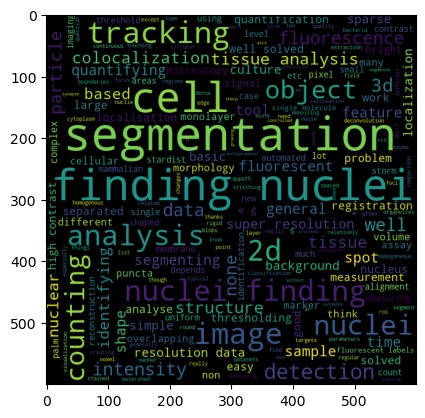

In [410]:
# wordcloud for well solved image analysis problems_2021
from wordcloud import WordCloud, STOPWORDS
well_solved_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_think_are_generally_well-solved.txt')
well_solved_2021 = well_solved_2021.rename(columns= {'0':'well_solved'})

input_2021 = ''.join(well_solved_2021["well_solved"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
well_solved_wc_2021 = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=4).generate(input_2021)
plt.imshow(well_solved_wc_2021)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

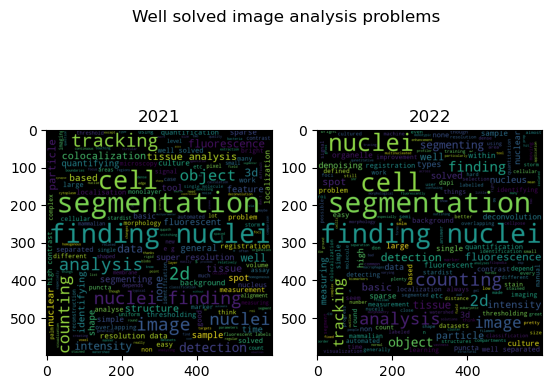

In [411]:
#comparison of well solved image analysis problems - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Well solved image analysis problems')

ax[0].imshow(well_solved_wc_2021)
ax[1].imshow(well_solved_wc)
ax[0].set_title('2021')
ax[1].set_title('2022')

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\3966255257.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



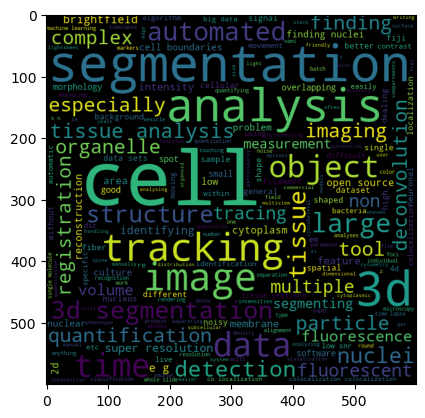

In [407]:
# wordcloud for image analysis problems which need better solutions -2021
better_sol_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_wish_had_easier_better_solutions.txt')
better_sol_2021 = better_sol_2021.rename(columns= {'0':'better_sol'})
better_sol_2021

#worlcloud
input_better_2021 = ''.join(better_sol_2021["better_sol"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
better_sol_2021_wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=600, height=600, random_state=5).generate(input_better_2021)
plt.imshow(better_sol_2021_wc)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

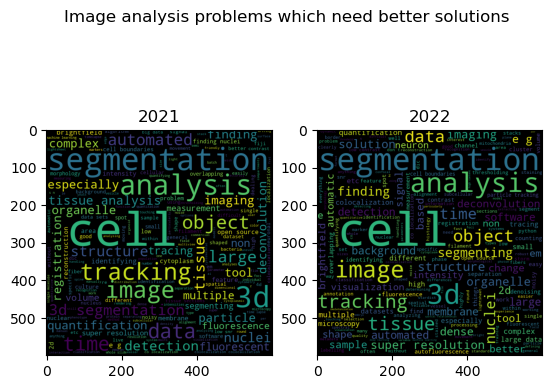

In [409]:
#comparison - image analysis problems which need better solutions - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Image analysis problems which need better solutions')

ax[0].imshow(better_sol_2021_wc)
ax[1].imshow(well_solved_better)
ax[0].set_title('2021')
ax[1].set_title('2022')

C:\Users\ssivagur\AppData\Local\Temp\ipykernel_7788\2361656632.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



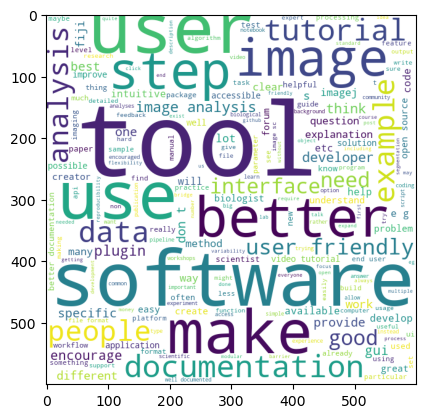

In [413]:
# wordcloud for creators role -2021
creator_2021 = pd.read_csv('C:\\Users\\ssivagur\\Documents\\2021_Image_analysis_survey_data\\What_do_you_think_analysis_tool_CREATORS_such_as_software_developers_could_should_do_to_make_image_analysis_better_and_more_successful_How_best_could_we_encourage_them_to_do_it.txt')
creator_2021 = creator_2021.rename(columns= {'0':'creator_role'})
creator_2021

input_creator_2021 = ''.join(creator_2021["creator_role"].str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' '))
stopwords = set(STOPWORDS)
creator_2021 = WordCloud(stopwords=STOPWORDS, background_color='white', width=600, height=600, random_state=1).generate(input_creator_2021)
plt.imshow(creator_2021)

Text(0.5, 1.0, '2022')

<Figure size 640x480 with 0 Axes>

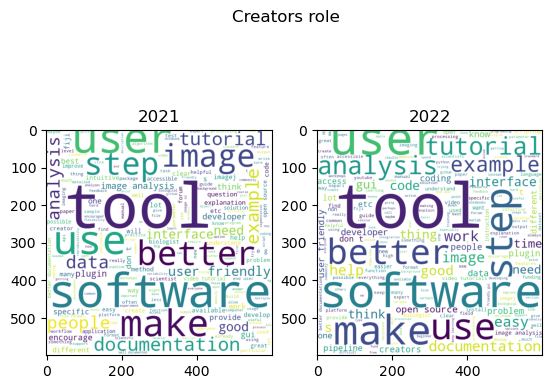

In [416]:
#comparison - Creators role - 2021 and 2022
plt.figure()
fig, ax = plt.subplots(1,2)
fig.suptitle('Creators role')

ax[0].imshow(creator_2021)
ax[1].imshow(well_solved_creator)
ax[0].set_title('2021')
ax[1].set_title('2022')

In [396]:
int_skills_df

,Interes in topics Image analysis theory,Interest in topics Image analysis practices,Interest in topics related to sub discipline,Interest in topics Specific software tool,Interest in topics Deep learning for image analysis,Interest in topics Analyzing large images,Interest in topics Visualization of results,Knowledge of computational skills
0,Somewhat interested,Moderately interested,Very interested,Very interested,Somewhat interested,Not at all interested,Somewhat interested,High skill
1,Somewhat interested,Very interested,Moderately interested,Somewhat interested,Very interested,Moderately interested,Somewhat interested,Medium skill
2,Somewhat interested,Somewhat interested,Moderately interested,Moderately interested,Moderately interested,Moderately interested,Moderately interested,Medium skill
3,Moderately interested,Very interested,Very interested,Very interested,Moderately interested,Somewhat interested,Moderately interested,Medium skill
4,Very interested,Moderately interested,Moderately interested,Not at all interested,Not at all interested,Moderately interested,Moderately interested,High skill
...,...,...,...,...,...,...,...,...
489,Moderately interested,Very interested,Very interested,Moderately interested,Moderately interested,Moderately interested,Very interested,Low skill
490,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Medium skill
491,Very interested,Very interested,Very interested,Somewhat interested,Very interested,Very interested,Very interested,High skill
492,Moderately interested,Moderately interested,Very interested,Very interested,Very interested,Very interested,Very interested,Medium skill


In [397]:
df_per = int_skills_df.loc[:, ["Interes in topics Image analysis theory", "Knowledge of computational skills"]]


In [418]:
df_theory=df_per.groupby(['Interes in topics Image analysis theory','Knowledge of computational skills']).size().reset_index()
df_theory['Percentage']=df_per.groupby(['Interes in topics Image analysis theory','Knowledge of computational skills']).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values
df_theory.columns= ['Interes in topics Image analysis theory', 'Knowledge of computational skills', 'Counts', 'Percentage']
df_theory['Percentage'] =  df_theory['Percentage'].map('{:,.2f}%'.format)

In [420]:
df_per_1 = int_skills_df.loc[:, ["Interest in topics Image analysis practices", "Knowledge of computational skills"]]
df_practices=df_per_1.groupby(['Interest in topics Image analysis practices','Knowledge of computational skills']).size().reset_index()
df_practices['Percentage']=df_per_1.groupby(['Interest in topics Image analysis practices','Knowledge of computational skills']).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values
df_practices.columns= ['Interest in topics Image analysis practices', 'Knowledge of computational skills', 'Counts', 'Percentage']
df_practices['Percentage'] =  df_practices['Percentage'].map('{:,.2f}%'.format)

In [423]:
per_skills = go.Figure()

per_skills.add_trace(go.Bar(name ='Image analysis theory', x=df_theory["Interes in topics Image analysis theory"], y=df_theory["Percentage"], hovertext=df_theory["Knowledge of computational skills"]))
per_skills.add_trace(go.Bar(name = 'Image analysis practices', x = df_practices["Interest in topics Image analysis practices"], y=df_practices["Percentage"], hovertext=df_practices["Knowledge of computational skills"]))

per_skills.update_layout(barmode='group', xaxis = {'categoryorder':'array', 'categoryarray':['Very interested','Moderately interested','Somewhat interested','Not at all interested']})
per_skills.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)


In [ ]:
fig_skill = px.bar(df_theory, x=df_theory["Interes in topics Image analysis theory"], y=df_theory["Percentage"], color=df_theory["Knowledge of computational skills"], barmode='stack')

fig_skill.update_layout(barmode='stack', xaxis = {'categoryorder':'array', 'categoryarray':['Very interested','Moderately interested','Somewhat interested','Not at all interested']})
fig_skill.update_layout(title="Topics of interest for the image analysis tutorials", title_x=0.5, width=900, height=500)
fig_skill.update_yaxes(range=[0, 100], ticklabelstep=20)